<a href="https://colab.research.google.com/github/rania593/checkpoint-python/blob/main/checkpoint6_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import numpy as np
from numpy import NaN
import matplotlib as plot

In [ ]:
df = pd.read_csv(r'/content/titanic-passengers.csv',sep=';')

In [ ]:
df1 = df.fillna(0)

In [ ]:
df1['Survived'].replace(["Yes","No"], [1,0], inplace=True)

In [ ]:
df1['Sex'].replace(["male","female"], [1,0], inplace=True)

In [ ]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df1.Survived.value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df1.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [ ]:
df1.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,0,S
1,1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,0,S
3,3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,0,S
4,4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,C
887,887,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,0,C
888,888,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8.6625,0,S
889,889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,0.0,0,0,349215,7.8958,0,S


In [ ]:
feature_cols = ["Sex","Age","Pclass"]
X = df1[feature_cols] #features
y = df1.Survived #target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7985074626865671


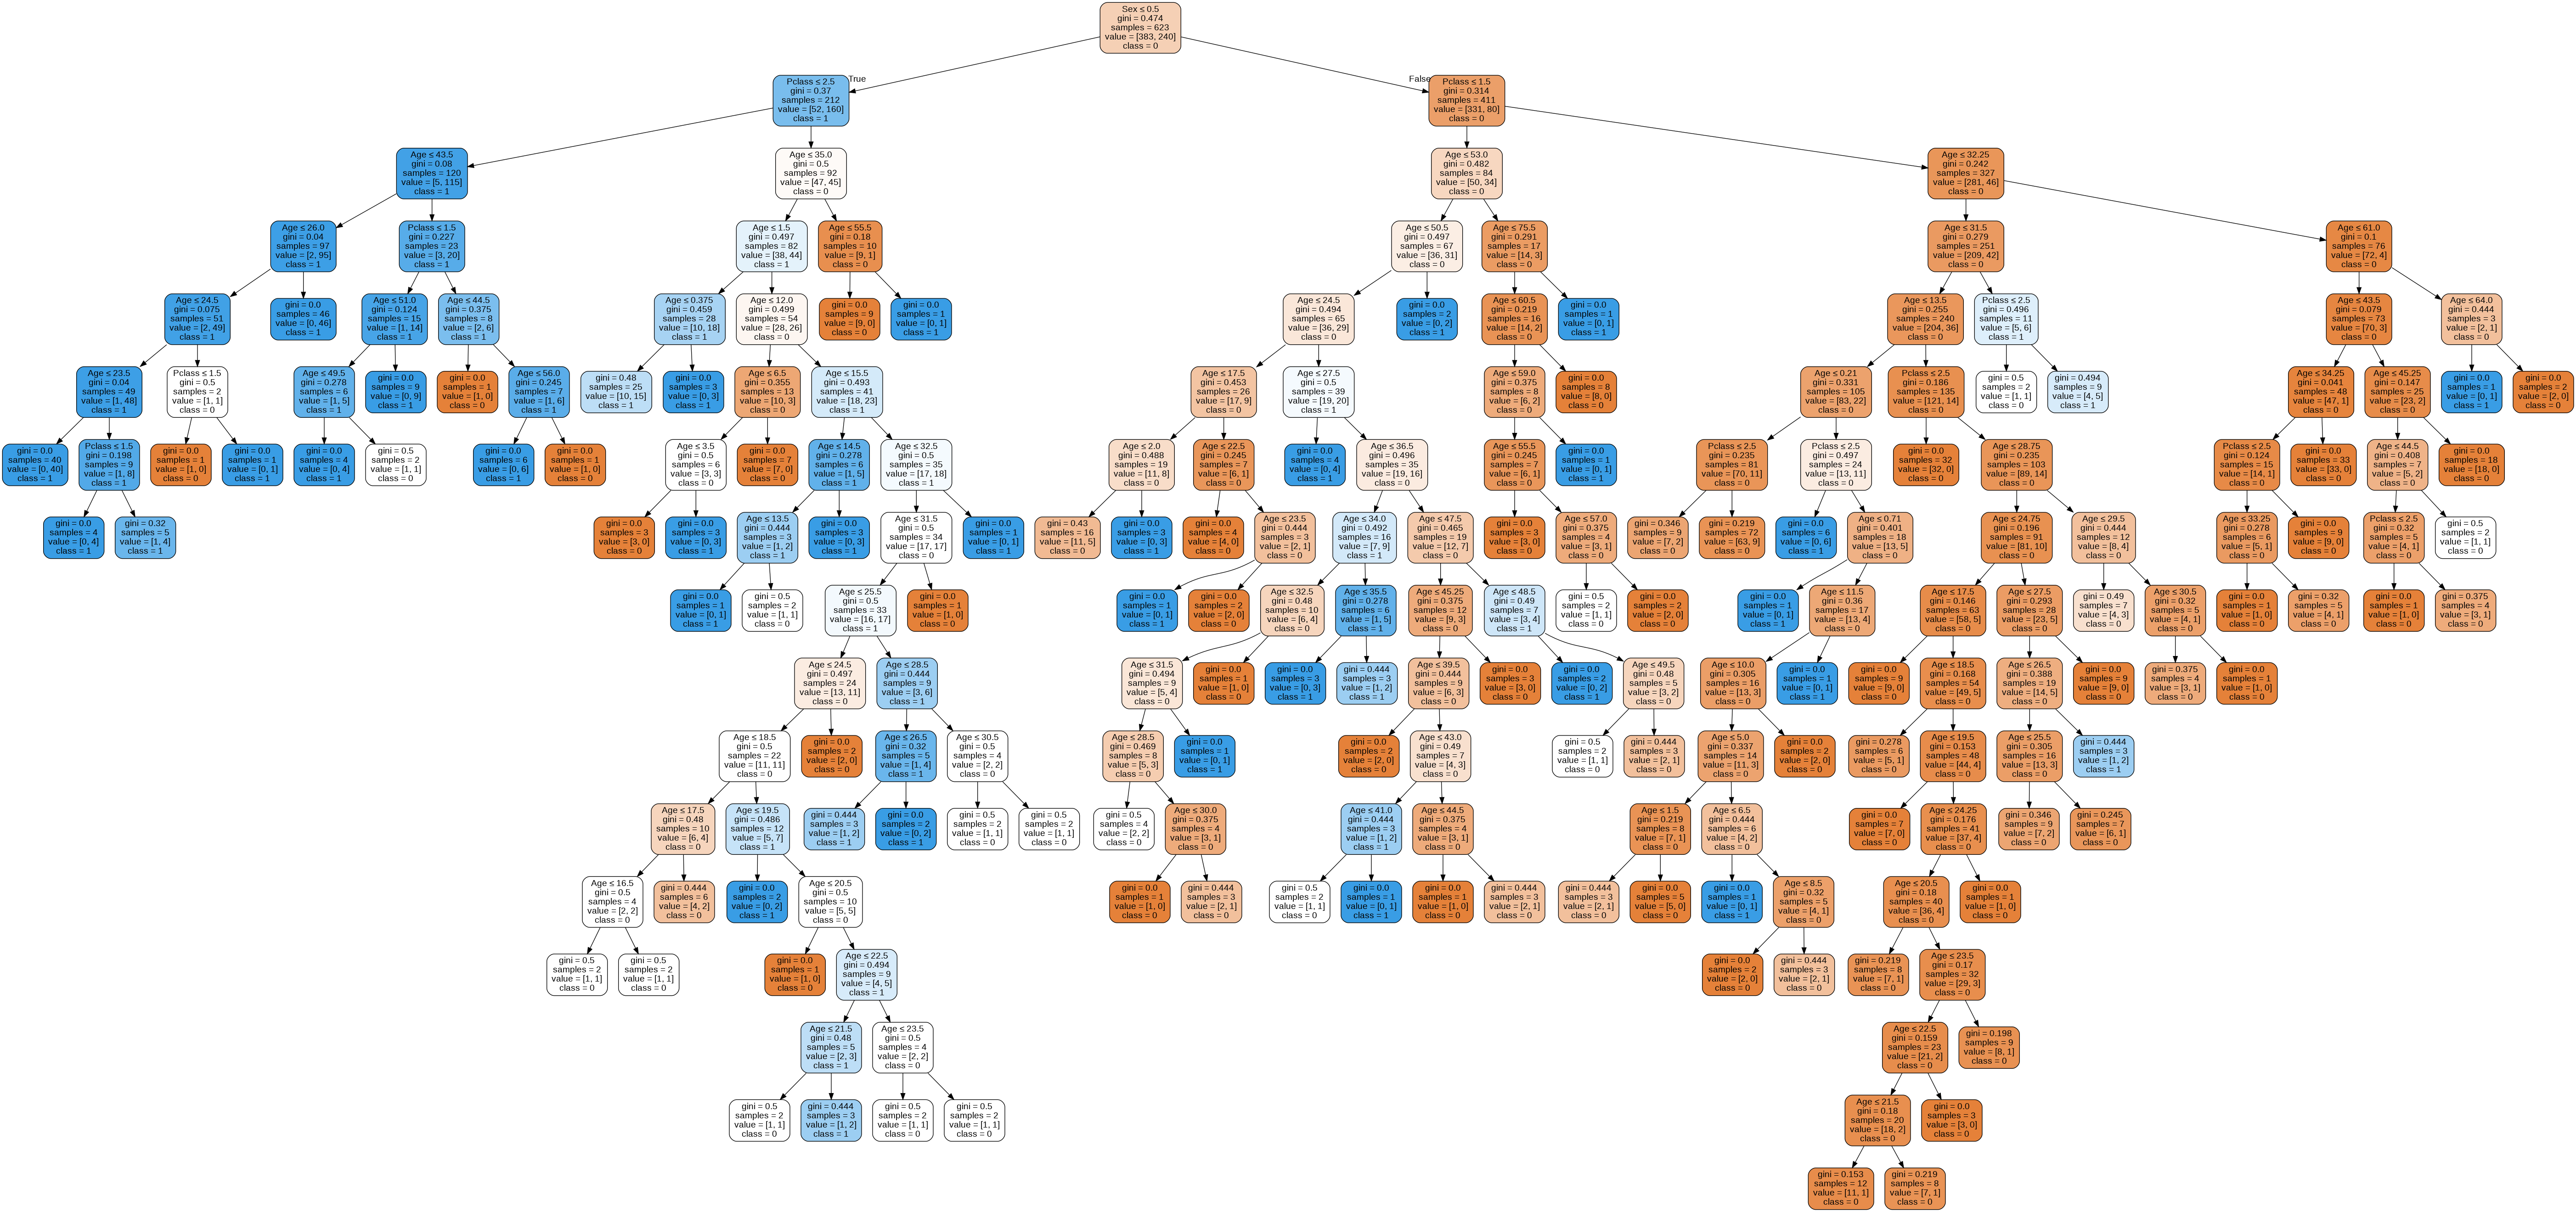

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())